# First Look at the Dataset

In [395]:
import pandas as pd
All=pd.read_csv('Pheonix_Final_v2.csv')

In [396]:
All.head()

,Unnamed: 0,business_id,Shortlisted?,ProjectCategory,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,label,PARKING,BikeParking,HairSpecializesIn_coloring,CONSUMER_SERVICE,NoiseLevel,Alcohol,Ambience_romantic,HappyHour,RECOMMENDATION,DogsAllowed,SPECIAL_FOOD,AgesAllowed,Unnamed: 0.1,weekday,weekend,averghour,if_Chain,polarity
0,0,rDMptJYWtnMhpQu_rRXHng,Yes,Burger,"""McDonald's""",NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,33.607070,-112.064382,1.0,10,1,Fast Food;Burgers;Restaurants,-1,1,0,0,0,0,0,0,0,0,1,0.0,0,3253,0.0,0.0,0.000000,1,0.152415
1,1,1WBkAuQg81kokZIPMpn9Zg,Yes,Burger,"""Charr An American Burger Bar""",NaN,"""777 E Thunderbird Rd, Ste 107""",Phoenix,AZ,85022,33.607310,-112.063404,3.0,232,1,Burgers;Restaurants,-1,1,0,0,0,0,0,0,0,0,0,0.0,0,3229,56.0,22.0,11.142857,1,0.233437
2,2,iPa__LOhse-hobC2Xmp-Kw,Yes,Burger,"""McDonald's""",NaN,"""1635 E Camelback Rd""",Phoenix,AZ,85016,33.508765,-112.046240,3.0,34,1,Restaurants;Burgers;Fast Food,-1,1,0,0,0,0,0,0,0,0,1,0.0,0,2461,90.0,36.0,18.000000,1,0.104785
3,3,QkG3KUXwqZBW18A9k1xqCA,Yes,Other,"""Red Lobster""",NaN,"""2810 North 75th Ave""",Phoenix,AZ,85035,33.478735,-112.221379,2.5,37,1,American (Traditional);Restaurants;Seafood,0,0,1,0,0,0,0,0,0,0,0,0.0,0,3022,56.0,23.0,11.285714,0,0.198911
4,4,5XejqzaFmtkZMstJS5Iy-w,Yes,Sandwiches,"""D'Lish Cafe""",NaN,"""503 W Thomas Rd""",Phoenix,AZ,85013,33.480301,-112.080586,4.0,37,0,Vegan;American (New);Restaurants;Sandwiches;Sa...,0,0,0,0,1,0,0,0,0,0,0,0.0,0,623,25.0,10.0,5.000000,0,0.201747


In [397]:
All.columns

Index(['Unnamed: 0', 'business_id', 'Shortlisted?', 'ProjectCategory', 'name',
       'neighborhood', 'address', 'city', 'state', 'postal_code', 'latitude',
       'longitude', 'stars', 'review_count', 'is_open', 'categories', 'label',
       'PARKING', 'BikeParking', 'HairSpecializesIn_coloring',
       'CONSUMER_SERVICE', 'NoiseLevel', 'Alcohol', 'Ambience_romantic',
       'HappyHour', 'RECOMMENDATION', 'DogsAllowed', 'SPECIAL_FOOD',
       'AgesAllowed', 'Unnamed: 0.1', 'weekday', 'weekend', 'averghour',
       'if_Chain', 'polarity'],
      dtype='object')

In [398]:
All1=All.drop(columns=['Unnamed: 0.1','Unnamed: 0','name','address', 'city', 'state', 'postal_code', 'latitude',
       'longitude','categories','business_id'])

### Encode Categorical Features

In [399]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

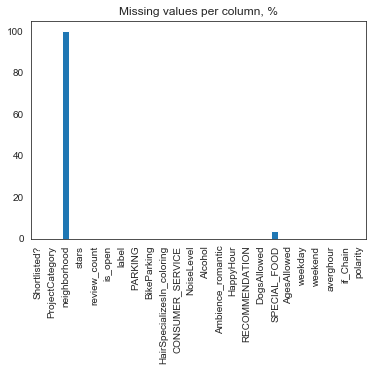

In [400]:
listings_missing_df = All1.isnull().mean()*100
listings_missing_df.plot.bar(title='Missing values per column, %')

In [401]:
All1['Shortlisted?']=le.fit_transform(All1['Shortlisted?']) 
All1['ProjectCategory']=le.fit_transform(All1['ProjectCategory']) 
All1=All1.drop(columns=['neighborhood'])
All1['SPECIAL_FOOD'] = All1['SPECIAL_FOOD'].fillna(All1['SPECIAL_FOOD'].mode()[0])

In [402]:
All1.head()

,Shortlisted?,ProjectCategory,stars,review_count,is_open,label,PARKING,BikeParking,HairSpecializesIn_coloring,CONSUMER_SERVICE,NoiseLevel,Alcohol,Ambience_romantic,HappyHour,RECOMMENDATION,DogsAllowed,SPECIAL_FOOD,AgesAllowed,weekday,weekend,averghour,if_Chain,polarity
0,0,3,1.0,10,1,-1,1,0,0,0,0,0,0,0,0,1,0.0,0,0.0,0.0,0.000000,1,0.152415
1,0,3,3.0,232,1,-1,1,0,0,0,0,0,0,0,0,0,0.0,0,56.0,22.0,11.142857,1,0.233437
2,0,3,3.0,34,1,-1,1,0,0,0,0,0,0,0,0,1,0.0,0,90.0,36.0,18.000000,1,0.104785
3,0,18,2.5,37,1,0,0,1,0,0,0,0,0,0,0,0,0.0,0,56.0,23.0,11.285714,0,0.198911
4,0,20,4.0,37,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,25.0,10.0,5.000000,0,0.201747


# Import Libaries

In [403]:
# Core Libraries
import numpy as np
import pandas as pd
import datetime
import random

#Plots
import seaborn as sns
import matplotlib.pyplot as plt

#Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
#from sklearn.kernel_ridge import KernelRidge
#from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.classifier import StackingCVClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

#Stats
from scipy.stats import skew, norm, boxcox_normmax
from scipy.special import boxcox1p

#Preprocess
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

#Show all the columns instead of part of them
pd.set_option('display.max_columns', None)

#ignore useless warnings
import warnings
warnings.filterwarnings(action='ignore')
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

# Checking the missing value data

We are satisified with the reusults that there is only the neighborhood columns which contains a lot of missing values, thus, we decided to drop the neighborhood columns 

### * Extract the datasets for blue area and datasets for red area

In [404]:
Blue=All1.loc[All1['label'] == -1]
Blue.shape

(2327, 23)

In [405]:
Red=All1.loc[All1['label'] == 0]
Red.shape

(1973, 23)

# Explory Data Analysis（Y）

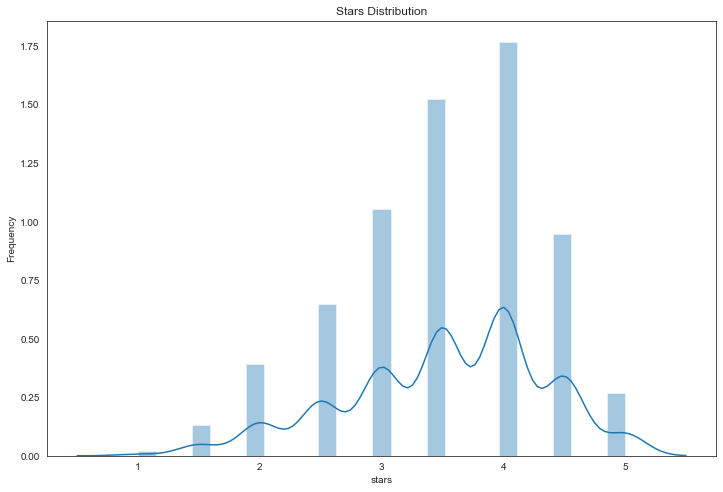

In [406]:
sns.set_style('white')
plt.figure(figsize=(12, 8))
sns.distplot(Blue['stars'])
plt.xlabel('stars')
plt.ylabel('Frequency')
plt.title('Stars Distribution')
plt.show()

# Feature Engineering

### * categorize Y varible

In [407]:
Blue.stars.value_counts()

4.0    610
3.5    525
3.0    363
4.5    326
2.5    223
2.0    135
5.0     92
1.5     46
1.0      7
Name: stars, dtype: int64

In [408]:
Blue['stars'] = Blue['stars'].astype(float)
star = []
for i in Blue['stars']:
    if i <= 3.5:
        star.append(1)
    else:
        star.append(2)
Blue['stars'] = star

In [409]:
y=Blue['stars']

In [410]:
X_train, X_test, y_train, y_test = train_test_split(Blue, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1861, 23) (1861,)
(466, 23) (466,)


In [411]:
# Split features and labels
train_labels = X_train['stars'].reset_index(drop=True)
train_features = X_train.drop(['stars'], axis=1)

In [412]:
test_labels = X_test['stars'].reset_index(drop=True)
test_features = X_test.drop(['stars'], axis=1)


### Scaling

In [413]:
train_features = preprocessing.scale(train_features)
test_features = preprocessing.scale(test_features)


# Setup Models

In [414]:
# Light Gradient Boosting Classifiers
lightgbm = LGBMClassifier(boosting_type='gbdt', 
                        num_leaves=6,
                        learning_rate=0.01, 
                        n_estimators=7000,
                        max_bin=200, 
                        bagging_fraction=0.8,
                        bagging_freq=4, 
                        bagging_seed=8,
                        feature_fraction=0.2,
                        feature_fraction_seed=8,
                        min_sum_hessian_in_leaf = 11,
                        verbose=-1,
                        random_state=33)

# XGBoost Classifiers
xgboost = XGBClassifier(learning_rate=0.01,
                        n_estimators=6000,
                        max_depth=4,
                        min_child_weight=0,
                        gamma=0.6,
                        subsample=0.7,
                        colsample_bytree=0.7,
                        objective='multi:softmax',
                        nthread=-1,
                        scale_pos_weight=1,
                        seed=27,
                        reg_alpha=0.00006,
                        random_state=33)

## Elasticnet for feature selection
#elasticnet = make_pipeline(RobustScaler(),
#                           ElasticNetCV(max_iter=1e7))

# Support Vector Classifier
svr = SVC(C=10000, gamma=0.0003)

# Gradient Boosting Classifier
gbr = GradientBoostingClassifier(n_estimators=3000,
                                 learning_rate=0.1,
                                 max_depth=2,
                                 max_features=None,
                                 min_samples_leaf=15,
                                 min_samples_split=10,
                                 #loss='huber',
                                 random_state=33) 

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=2400,
                           max_depth=30,
                           min_samples_split=5,
                           min_samples_leaf=5,
                           max_features=None,
                           oob_score=True,
                           random_state=42)

# # Stack up all the models above, optimized using xgboost
# stack_gen = StackingCVClassifier(classifiers=[lightgbm, svr, xgboost, gbr, rf], 
#                             use_probas=True,
#                             use_features_in_secondary=True,
#                             meta_classifier=lightgbm,
#                             cv=6)

# Train Models

In [416]:
rf = RandomForestClassifier(n_estimators=2400,
                           max_depth=12,
                           min_samples_split=15,
                           min_samples_leaf=15,
                           max_features=None,
                           oob_score=True,
                           random_state=42).fit(train_features, train_labels)

In [417]:
y_predict=rf.predict(test_features)
print(classification_report(test_labels, y_predict))
preds =rf.predict(train_features)
print(classification_report(train_labels, preds))

              precision    recall  f1-score   support

           1       0.73      0.80      0.76       265
           2       0.70      0.60      0.65       201

    accuracy                           0.71       466
   macro avg       0.71      0.70      0.70       466
weighted avg       0.71      0.71      0.71       466

              precision    recall  f1-score   support

           1       0.76      0.83      0.79      1034
           2       0.76      0.67      0.71       827

    accuracy                           0.76      1861
   macro avg       0.76      0.75      0.75      1861
weighted avg       0.76      0.76      0.76      1861



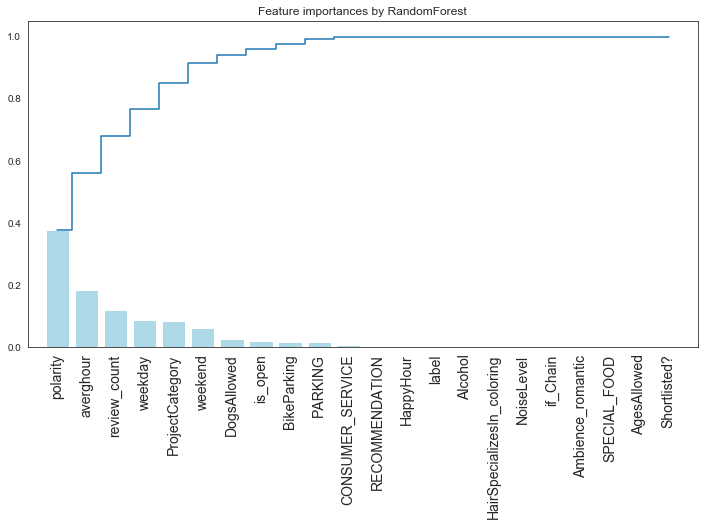

In [418]:
importances = rf.feature_importances_
feat_names = X_train.drop(['stars'],axis=1).columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomForest")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [420]:
Red['stars'] = Red['stars'].astype(float)
star = []
for i in Red['stars']:
    if i <= 3.5:
        star.append(1)
    else:
        star.append(2)
Red['stars'] = star
X_train, X_test, y_train, y_test = train_test_split(Blue, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1861, 23) (1861,)
(466, 23) (466,)


In [421]:
train_labels = X_train['stars'].reset_index(drop=True)
train_features = X_train.drop(['stars'], axis=1)
test_labels = X_test['stars'].reset_index(drop=True)
test_features = X_test.drop(['stars'], axis=1)
train_features = preprocessing.scale(train_features)
test_features = preprocessing.scale(test_features)

In [429]:
rf = RandomForestClassifier(n_estimators=2400,
                           max_depth=12,
                           min_samples_split=15,
                           min_samples_leaf=5,
                           max_features=None,
                           oob_score=True,
                           random_state=42).fit(train_features, train_labels)

In [430]:
y_predict=rf.predict(test_features)
print(classification_report(test_labels, y_predict))
preds =rf.predict(train_features)
print(classification_report(train_labels, preds))

              precision    recall  f1-score   support

           1       0.69      0.59      0.63       264
           2       0.55      0.65      0.59       202

    accuracy                           0.61       466
   macro avg       0.62      0.62      0.61       466
weighted avg       0.63      0.61      0.62       466

              precision    recall  f1-score   support

           1       0.83      0.92      0.87      1035
           2       0.88      0.76      0.82       826

    accuracy                           0.85      1861
   macro avg       0.85      0.84      0.84      1861
weighted avg       0.85      0.85      0.85      1861



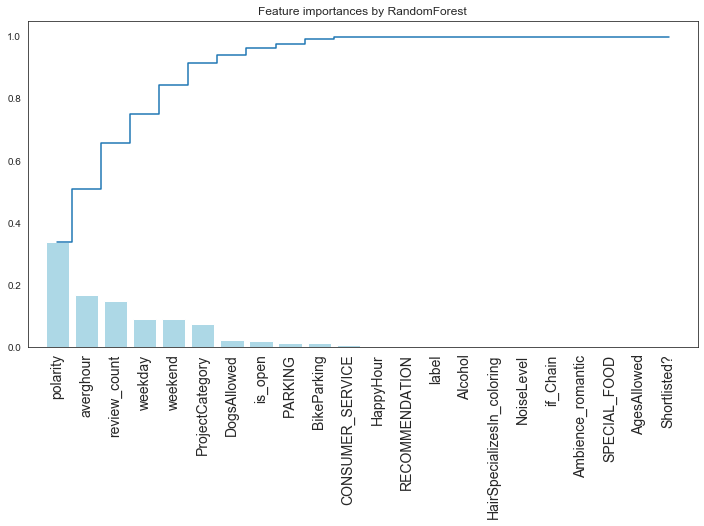

In [424]:
importances = rf.feature_importances_
feat_names = X_train.drop(['stars'],axis=1).columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomForest")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()